# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

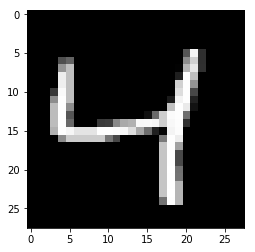

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [42]:
# Size of the flattened input images
n_input = mnist.train.images.shape[1]

# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,  [None, n_input])
targets_ = tf.placeholder(tf.float32,  [None, n_input])

# Output of hidden layer, single fully connected layer here with ReLU activation
weights_hidden = tf.Variable(tf.truncated_normal([n_input, encoding_dim], stddev=0.1))
biases_hidden = tf.Variable(tf.zeros([encoding_dim]))
encoded = tf.matmul(inputs_, weights_hidden) + biases_hidden
encoded = tf.nn.relu(encoded)

# Output layer logits, fully connected layer with no activation
weights_out = tf.Variable(tf.truncated_normal([encoding_dim, n_input], stddev=0.1))
biases_out = tf.Variable(tf.zeros([n_input]))
logits = tf.matmul(encoded, weights_out) + biases_out
 
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [43]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [44]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7033
Epoch: 1/20... Training loss: 0.6974
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6867
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6773
Epoch: 1/20... Training loss: 0.6721
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6614
Epoch: 1/20... Training loss: 0.6546
Epoch: 1/20... Training loss: 0.6469
Epoch: 1/20... Training loss: 0.6391
Epoch: 1/20... Training loss: 0.6307
Epoch: 1/20... Training loss: 0.6212
Epoch: 1/20... Training loss: 0.6102
Epoch: 1/20... Training loss: 0.5991
Epoch: 1/20... Training loss: 0.5871
Epoch: 1/20... Training loss: 0.5726
Epoch: 1/20... Training loss: 0.5629
Epoch: 1/20... Training loss: 0.5444
Epoch: 1/20... Training loss: 0.5328
Epoch: 1/20... Training loss: 0.5138
Epoch: 1/20... Training loss: 0.5032
Epoch: 1/20... Training loss: 0.4899
Epoch: 1/20... Training loss: 0.4702
Epoch: 1/20... Training loss: 0.4578
Epoch: 1/20... Training loss: 0.4438
E

Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1790
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1795
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1798
E

Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1426
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1446
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1481
E

Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1268
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1301
E

Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1170
E

Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1102
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1112
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1088
Epoch: 4/20... Training loss: 0.1091
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1108
E

Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1098
E

Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1027
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1037
E

Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0932
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0950
E

Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0949
E

Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0885
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0883
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0878
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0991
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

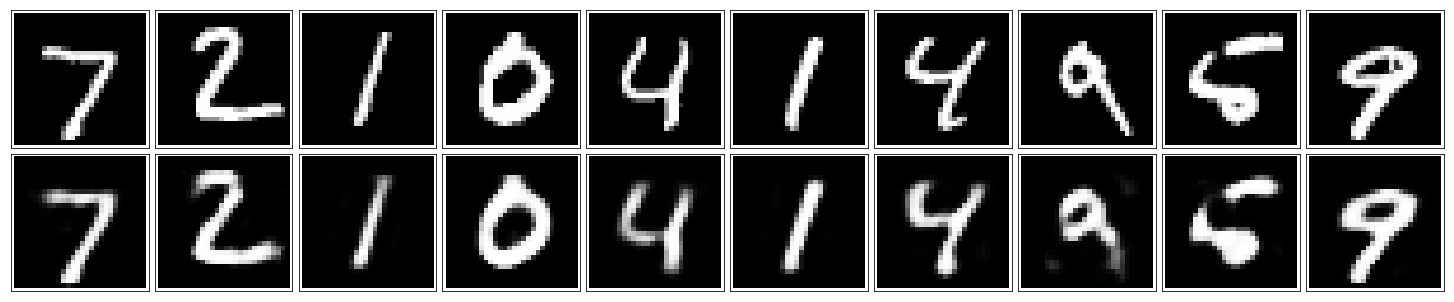

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.